# Linear Regression

This notebook implements the *ordinary least squares* Linear Regression algorithm, using batch Gradient Descent.

Dataset: [Boston Housing Dataset](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class LinearRegression:
    def __init__(self, learning_rate: float):
        self._learning_rate = learning_rate
        self._parameters = []

    def fit(self, X: np.ndarray, y: np.ndarray):
        # this implements BATCH gradient descent
        no_features = len(X[0])
        m = len(X)
        
        assert no_features >= 1

        self._parameters = [0.0] * (no_features + 1) # we allocate an extra paramater for the 'b' in y = mx + b
        # example: y = m1x + m2x + m3x + b: we have 3 features + 1 for the b

        converged = False

        while not converged:
            prev = None
            for j, param in enumerate(self._parameters):
                summation = 0
                for i in range(m):
                    x, y_ = X[i], y[i]

                    mul = 1 if j == 0 else x[j-1]
                    summation += ((self.predict(x) - y_) * mul)

                new_param = param - (self._learning_rate * summation)
                self._parameters[j] = new_param
                print(self._parameters)

                if prev is None:
                    prev = self._parameters.copy()
                elif prev == self._parameters:
                    # we have converged
                    converged = True
                    break

    def predict(self, x: np.ndarray):
        predict_y = self._parameters[0]
        for idx, val in enumerate(x, start=1):
            param = self._parameters[idx]
            predict_y += (param * val)

        return predict_y

In [5]:
df = pd.read_csv("datasets/HousingData.csv")
X = df[["NOX"]].to_numpy()
y = df["MEDV"].to_numpy()

In [6]:
model = LinearRegression(0.001)
model.fit(X, y)

[11.401600000000013, 0.0]
[11.401600000000013, 2.8942758488799996]
[16.221637500122515, 2.8942758488799996]
[16.221637500122515, 3.965450201134023]
[18.30208341404209, 3.965450201134023]
[18.30208341404209, 4.2786598360331585]
[19.2419133619963, 4.2786598360331585]
[19.2419133619963, 4.277194753979369]
[19.706600569216683, 4.277194753979369]
[19.706600569216683, 4.145541297196097]
[19.973107975723618, 4.145541297196097]
[19.973107975723618, 3.9604754747000452]
[20.1567061138132, 3.9604754747000452]
[20.1567061138132, 3.753945830799606]
[20.30537144640196, 3.753945830799606]
[20.30537144640196, 3.5392443903534403]
[20.439073597789044, 3.5392443903534403]
[20.439073597789044, 3.321898629610358]
[20.56612613411286, 3.321898629610358]
[20.56612613411286, 3.1042045576566926]
[20.68999152308827, 3.1042045576566926]
[20.68999152308827, 2.8871133195602328]
[20.812113260458712, 2.8871133195602328]
[20.812113260458712, 2.671016373309848]
[20.9330945603764, 2.671016373309848]
[20.9330945603764, 2

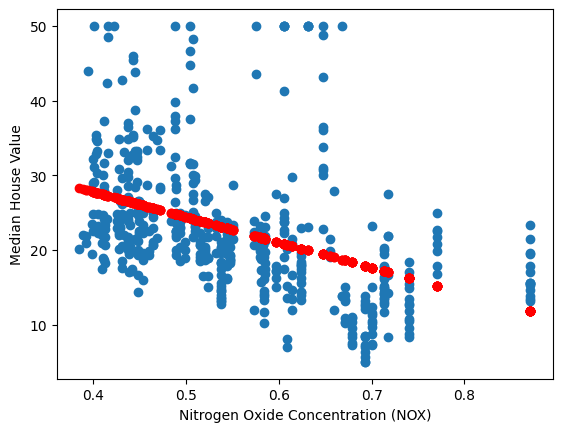

In [7]:
plt.scatter(X, y)
plt.xlabel("Nitrogen Oxide Concentration (NOX)")
plt.ylabel("Median House Value")

for x in X:
    y_pred = model.predict(np.array([x]))
    plt.plot(x, y_pred, 'ro')

plt.show()